In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
from utils.text_helper import TextHelper
from utils.text_load import Dictionary, Corpus
import yaml
from tqdm import tqdm_notebook as tqdm
import torch

In [5]:
with open('utils/words.yaml') as f:
    params = yaml.load(f)

In [6]:
helper = TextHelper(None, params, None)

In [8]:
helper.load_data()

In [9]:
helper.corpus.dictionary.idx2word[16027]

'<eos>'

In [16]:
percentages = list()
for tensor in tqdm(helper.corpus.train):
    total_count = tensor.shape[0]
    count = 0
    elems, counts = torch.unique(tensor, return_counts=True)
    
    for i in [49999, 49998, 16027]:
        bools = (elems==i)
        if bools.sum() > 0:
            count += counts[bools.nonzero().item()].item()
    percentages.append([count, total_count, elems.shape[0]])

In [15]:
percentages

[[750, 6113, 1558]]

In [36]:
percentages[0]

[750, 6113]

In [43]:
a, b = torch.unique(helper.corpus.train[0], return_counts=True)

In [58]:
(elems==i).nonzero()

tensor([], size=(0, 1), dtype=torch.int64)

In [59]:
bools = (elems==i)

In [66]:
if bools.sum() > 0:
    print('a')

In [70]:
percentages[0]

[tensor(750), 6113]

In [68]:
len(percentages)

80000

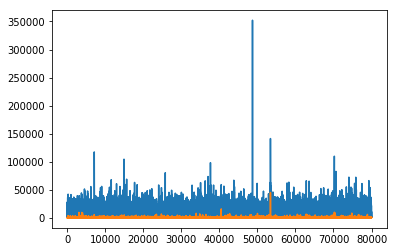

In [18]:


plt.plot(range(80000), [y for [x,y, _] in percentages])
plt.plot(range(80000), [x for [x,y, _] in percentages])

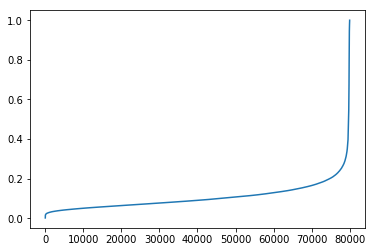

In [76]:
plt.plot(range(80000), sorted([x.item()/y for [x,y] in percentages]))

In [25]:
sorted([z for [_,_,z] in percentages])[100]

15

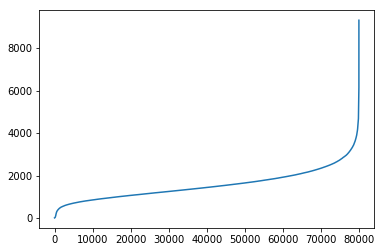

In [20]:
plt.plot(range(80000), sorted([z for [_,_,z] in percentages]))

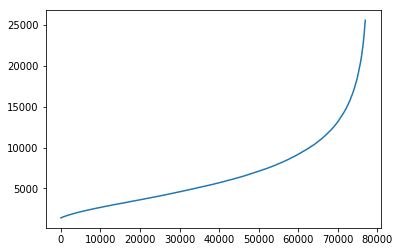

In [47]:
plt.plot(range(77000), sorted([y-x for [x,y,_] in percentages])[2000:-1000])

In [31]:
list_prec = list()
for [utility_symbols, total_symbols, unique_symbols] in percentages:
    if utility_symbols/total_symbols<0.2 and total_symbols-utility_symbols>1000 and unique_symbols>100:
        list_prec.append(True)
    else:
        list_prec.append(False)

In [32]:
sum(list_prec)

74665

In [30]:
torch.save(list_prec, 'utils/list_percentage.pt')

In [33]:
a = [5,6,7]

In [34]:
import random

In [42]:
random.sample(a, 3)

[7, 6, 5]